In [1]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import rcParams
rcParams["savefig.dpi"] = 96
rcParams["figure.dpi"] = 96

# The Dias (2000) model

## Introduction

The model proposed by [Dias (1972)](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JB077i026p04945)
describes the petrophysical properties of rocks from measurements of their
electrical polarization in a frequency range typically from
1 mHz to 100 kHz.

We refer to [Dias (2000)](https://library.seg.org/doi/10.1190/1.1444738)
for the implementation of the complex resistivity formula in BISIP. This model
predicts that the complex resistivity spectra $\rho^*$ of a
polarizable rock sample can be described by

\begin{equation}
\rho^* = \rho_0 \left[ 1-m\left(1-\frac{1}{1+i\omega\tau'\left(1+\frac{1}{\mu}\right)} \right) \right],
\end{equation}

where $\omega$ is the measurement angular frequencies
($\omega=2\pi f$) and $i$ is the imaginary unit. Additionally,

\begin{equation}
    \mu = i\omega\tau + \left(i\omega\tau''\right)^{1/2},
\end{equation}

\begin{equation}
    \tau' = (\tau/\delta)(1 - \delta)/(1 - m),
\end{equation}

\begin{equation}
    \tau'' = \tau^2 \eta^2.
\end{equation}

Here, $\rho^*$ depends on 5 parameters:

- $\rho_0 \in [0, \infty)$, the direct current resistivity $\rho_0 = \rho^*(\omega\to 0)$.
- $m \in [0, 1)$, the chargeability $m=(\rho_0 - \rho_\infty)/\rho_0$.
- $\tau \in [0, \infty)$, the relaxation time, related to
  average polarizable particle size.
- $\eta \in [0, 150]$, characteristic of the
  electrochemical environment producing polarization.
- $\delta \in [0, 1)$, the pore length fraction of the electrical double
  layer zone in the material.

In this tutorial we will invert a SIP data with the Dias model to explore the
parameter space of this semi-empirical SIP model. We will also quantify the
relationship between the various parameters.

## Exploring the parameter space

First import the required packages.

In [2]:
import os

import numpy as np
from IPython.display import display, Math
from bisip import Dias2000
from bisip import DataFiles

np.random.seed(42)

In [3]:
# This will get one of the example data files in the BISIP package
data_files = DataFiles()
filepath = data_files['SIP-K389172']

# Define MCMC parameters and Dias model
nwalkers = 32
nsteps = 1000
model = Dias2000(filepath=filepath, nwalkers=nwalkers, nsteps=nsteps)
# Fit model to data
model.fit()

100%|██████████| 1000/1000 [00:01<00:00, 511.36it/s]


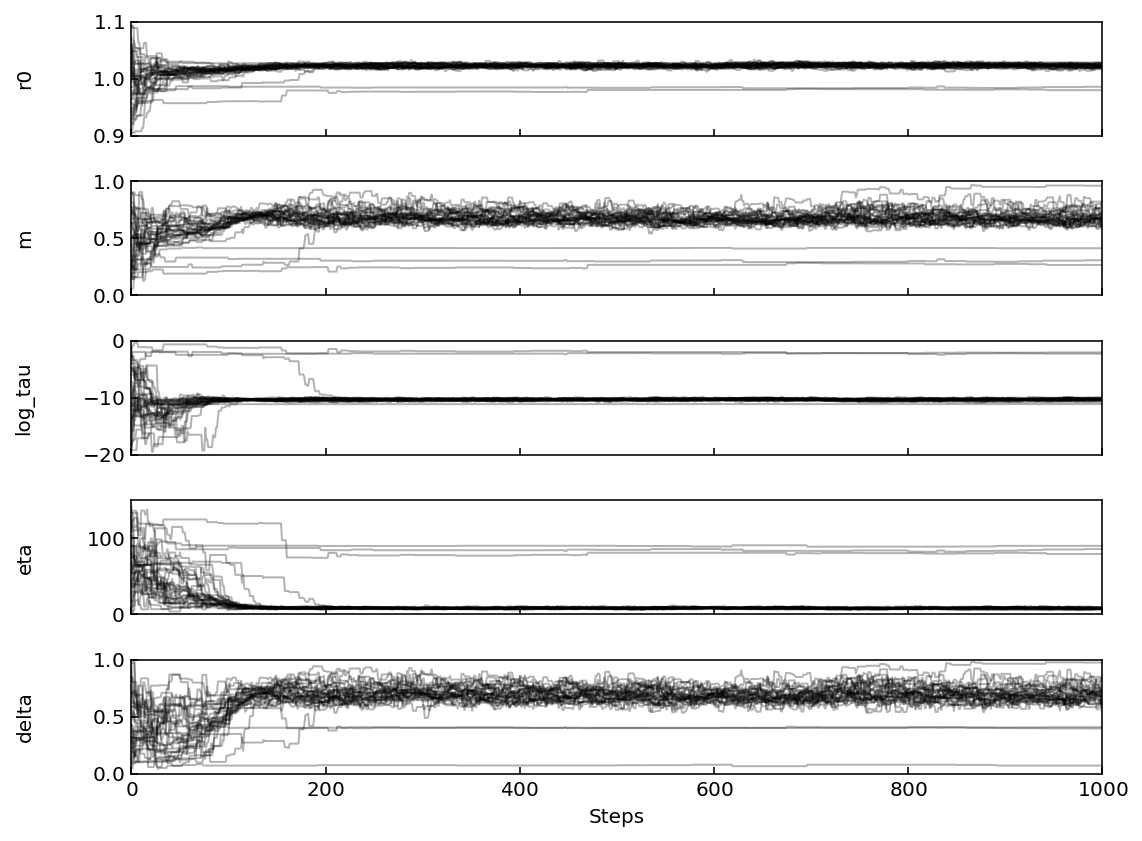

In [4]:
fig = model.plot_traces()

Some walkers get stuck in local minima because the priors are really wide. Nevertheless, we can see that the median solution of all these chains gives a satisfying result.

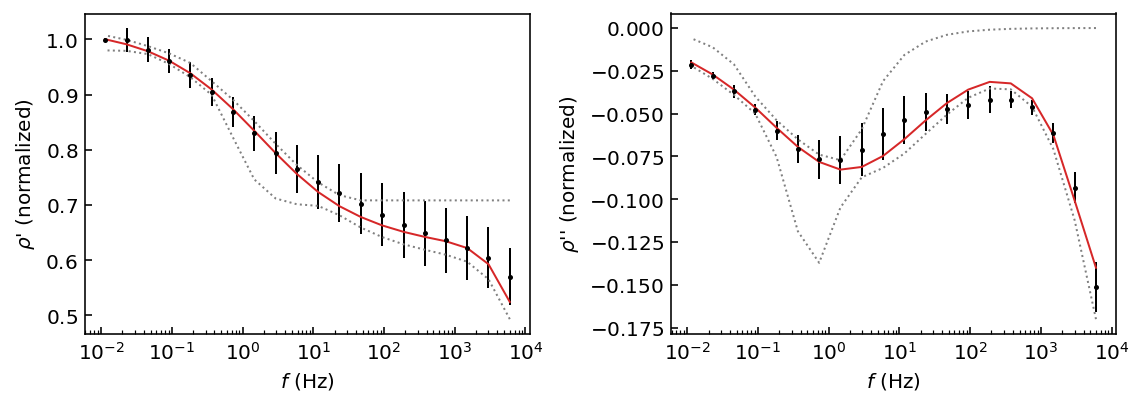

In [5]:
# Plot the fit by discarding the first 500 steps
fig = model.plot_fit(discard=500)

100%|██████████| 1000/1000 [00:01<00:00, 533.24it/s]


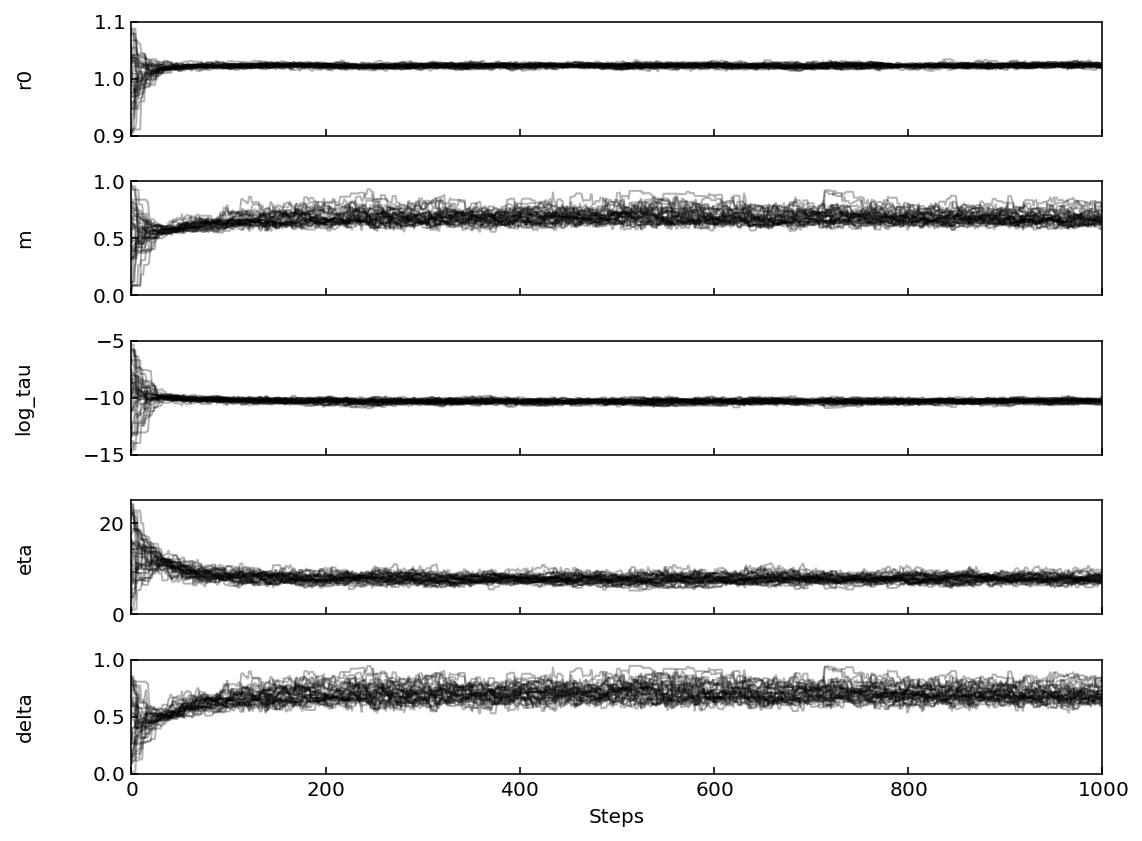

In [6]:
# Adjust the boundaries
model.params.update(eta=[0, 25], log_tau=[-15, -5])

model.fit()
fig = model.plot_traces()

The stricter priors have allowed all walkers to find a similar stationary state. With these improved parameter chains the fit quality should be improved.

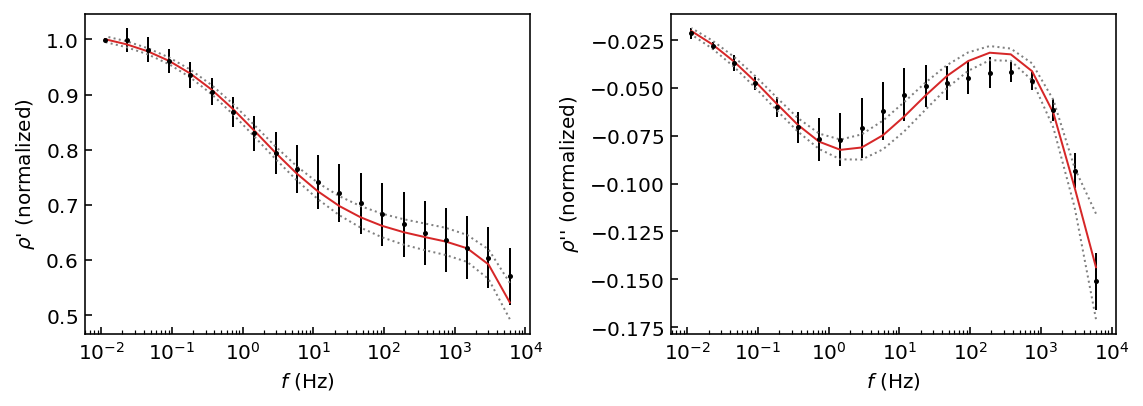

In [7]:
# Plot the fit by discarding the first 500 steps
fig = model.plot_fit(discard=500)

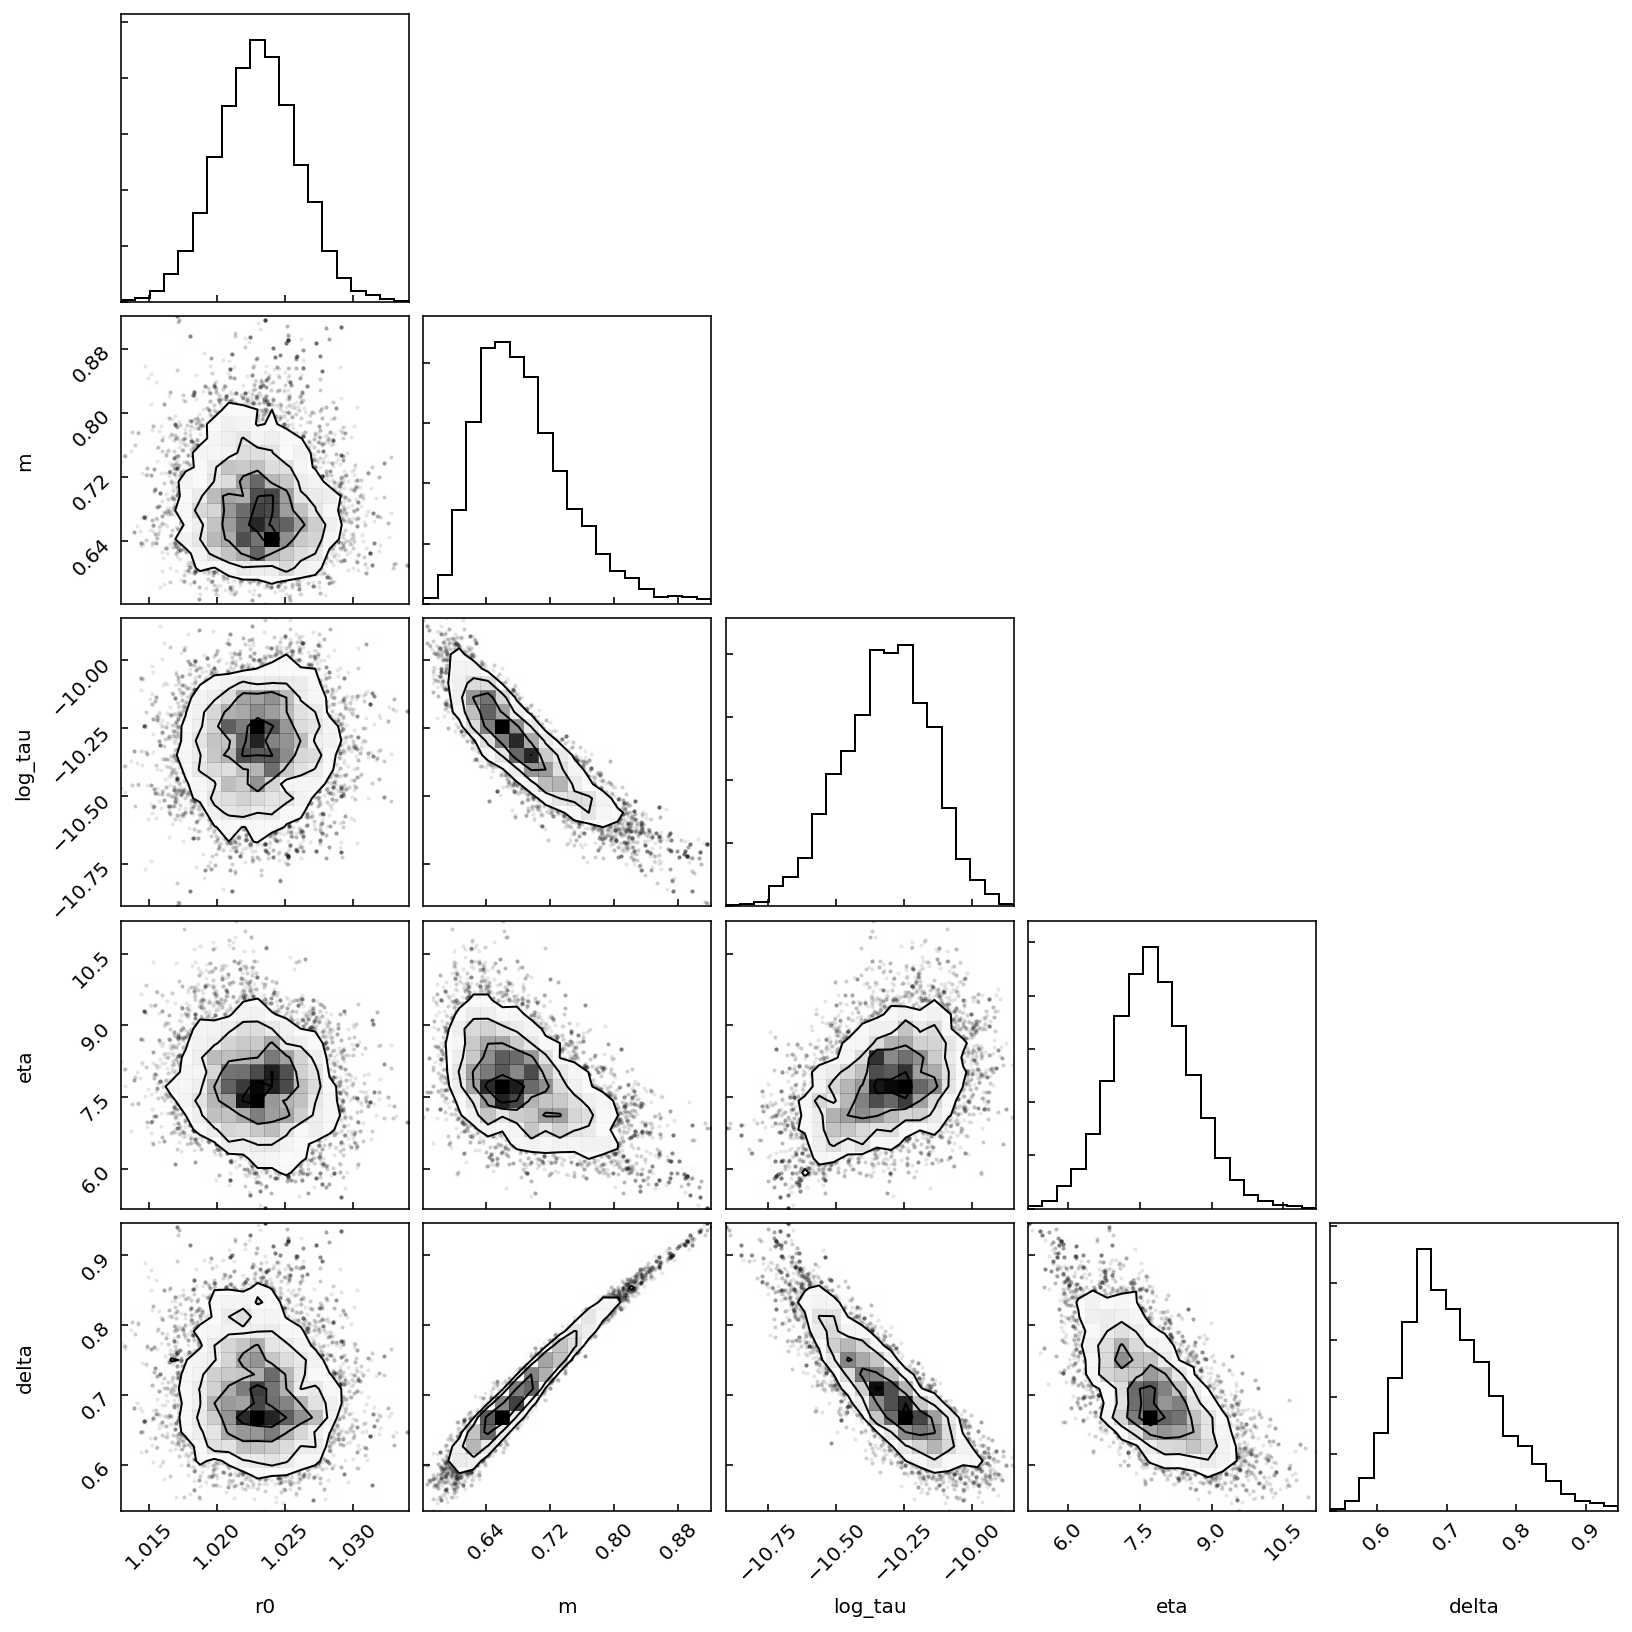

In [8]:
# Plot the posterior by discarding the first 500 steps
fig = model.plot_corner(discard=500)

In [9]:
# Use this utility function to nicely print parameter values 
# for the Dias model with LaTeX

# Print the mean and std of the parameters after discarding burn-in samples
values = model.get_param_mean(discard=500)
uncertainties = model.get_param_std(discard=500)

model.print_latex_parameters(model.param_names, values, uncertainties)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Conclusions